In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

data_path = "/run/media/kevin/Volume/OpenImages/"

In [2]:
# get file names
files = os.listdir(os.path.join(data_path, "pics"))
print(f"{len(files)} images downloaded")
image_ids = [x.replace(".jpg", "") for x in files]

# load class descriptions
cls = pd.read_csv(os.path.join(data_path, "class-descriptions-boxable.csv"), header=None, index_col=0)


# load image labels
labs = pd.read_csv(os.path.join(data_path, "train-annotations-bbox.csv"))
labs.head()

300424 images downloaded


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [3]:
# filter labels for available pics
labs = labs[labs['ImageID'].isin(image_ids)]
print(len(set(labs['ImageID'])))

300424


In [17]:
# Get the animal class id
animal = list(cls.loc[cls.iloc[:,0] == "Animal"].index)[0]
# Make Animal - noAnimal classification score for bounding boxes
labels = labs['LabelName']
len(labels)
animal_labs = labs.loc[labels == animal]
animal_pics = list(set(animal_labs['ImageID']))
animal_pics

['22f575c7b416b4d5',
 '22a4e1c87c888aba',
 '114164112f8a4551',
 '232c21d86312aaa5',
 '13400784d85dd6fb',
 '2265e177755be79f',
 '224a0f14d6b8ffb9',
 '2204e04af2ae9a94',
 '14faf3b16ce2e248',
 '066792ea79d2a509',
 '050248c0f3b054bc',
 '22b2949daf95bc9b',
 '1572502359356ece',
 '04af6261769abc0e',
 '1ba479937d4d7a60',
 '1f65cb0fede05d75',
 '21b9eacc97363320',
 '05752d1618361074',
 '00133dbb3a49ed74',
 '0527601bb161e522',
 '1b585137777433cb',
 '095ffa9e95b0fa2b',
 '162e95a25a7c8c8c',
 '150f9d31bb0cc3f2',
 '0f7af429efce13da',
 '1bdee8c18913bac9',
 '0877cc046eb7f764',
 '0610f57878ee6657',
 '000c034c59effe6d',
 '1610f13e12195291',
 '1619738794d55a40',
 '0a69a2acb851b965',
 '188d1a023046cb32',
 '1e4bc308c64e4aa9',
 '1d0580320547b2d6',
 '0f9eb03f776a9604',
 '19721f3b36f51373',
 '05291ed6ee4e4985',
 '0ace3b8ba4f246f3',
 '14fd00996d891ca0',
 '116eeb70643bfc89',
 '13c767a725c381c5',
 '0022f048c3c38afe',
 '21333ed48d0edfe9',
 '1de15bf71259aa63',
 '19c1804610e09d76',
 '2190a82c3bcbea58',
 '202605f6a39

22c608ff002cf70e
0
/m/0jbk     Animal
/m/04yx4       Man
Name: 1, dtype: object


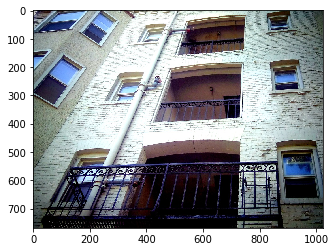

In [21]:
idx = 100
img_id = animal_pics[idx]
print(img_id)
# load and show image
im = Image.open(os.path.join(data_path,"pics",files[idx]))
plt.imshow(im)


# get labels
tmp = labs.loc[[x == img_id for x in list(labs['ImageID'])]]
#tmp = tmp[tmp['Confidence'] == 1]
tmp_labels = list(set(tmp['LabelName']))
print(cls.loc[tmp_labels,:].iloc[:,0])